In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [356]:
# bha = pd.read_csv('data/states.csv')
# kgp = pd.read_csv('data/kgp.csv')

In [357]:
# bha = bha[['Date', 'State', 'Confirmed']]
# bha = bha.sort_values(['State', 'Date']).reset_index(drop = True)

In [358]:
# lst_state = bha['State'].unique()

In [359]:
# fig, axs = plt.subplots(6, 6, figsize = (15, 15))
# id = 0

# for state in lst_state:
#     if (state != 'Ladakh' and state != 'State Unassigned' and state != 'Dadra and Nagar Haveli and Daman and Diu'):
#         df = bha[(bha['State'] == state) & ('2021-06-10' >= bha['Date']) & (bha['Date'] >= '2021-03-15')]
#         df['count'] = df['Confirmed'] - df['Confirmed'].shift(1)
#         df = df.dropna().reset_index(drop = True)
        

#         axs[int(id/6), id%6].set_xticklabels([])
#         axs[int(id/6), id%6].set_yticklabels([])
#         axs[int(id/6), id%6].set_title(state)
        
#         axs[int(id/6), id%6].plot(df['Date'][::2], df['count'][::2])
        
#         id = id + 1

# axs[5, 5].set_xticklabels([])
# axs[5, 5].set_yticklabels([])
# axs[5, 5].set_title('kgp')

# axs[5, 5].plot(kgp.index, kgp['count'], 'r')

# plt.show()

In [387]:
kgp = pd.read_csv('data/kgp.csv')

mx = kgp.describe()['count'].loc['max']
cutoff = mx * 0.05

start_id = 0
end_id = 0
flag = False
for id in kgp.index:
    if kgp.iloc[id]['count'] >= cutoff:
        if flag is False:
            flag = True
            start_id = id
    if kgp.iloc[id]['count'] == mx:
        end_id = id+1
        break

kgp = kgp.iloc[start_id:end_id]
kgp = kgp.reset_index(drop = True)
kgp['date1'] = [kgp.iloc[ei]['date'][6:] + '-' + kgp.iloc[ei]['date'][3:5] + '-' + kgp.iloc[ei]['date'][0:2] for ei in kgp.index]
kgp = kgp[['date1', 'count']]
kgp = kgp.rename(columns = {'date1' : 'date'})
kgp

,date,count
0,2021-12-27,4
1,2021-12-28,7
2,2021-12-29,6
3,2021-12-30,3
4,2021-12-31,7
5,2022-01-01,22
6,2022-01-02,30
7,2022-01-03,56
8,2022-01-04,71


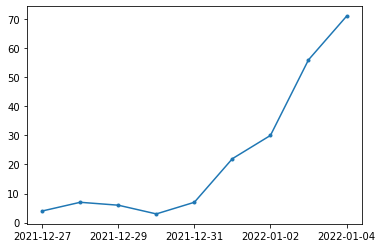

In [388]:
plt.plot(kgp['date'], kgp['count'], '.-')
plt.xticks(kgp['date'][::2])
plt.show()

In [392]:
bha = pd.read_csv('data/bha.csv')
bha['date1'] = [bha.iloc[ei]['date'][6:] + '-' + bha.iloc[ei]['date'][3:5] + '-' + bha.iloc[ei]['date'][0:2] for ei in bha.index]
bha = bha[['date1', 'state', 'count']]
bha = bha.rename(columns = {'date1' : 'date'})
bha

,date,state,count
0,2020-01-30,Kerala,1
1,2020-01-30,India,1
2,2020-02-02,Kerala,2
3,2020-02-02,India,2
4,2020-02-03,Kerala,3
...,...,...,...
21670,2021-10-31,Tripura,84468
21671,2021-10-31,India,34285612
21672,2021-10-31,Uttar Pradesh,1710158
21673,2021-10-31,Uttarakhand,343896


In [397]:
bha = bha.sort_values(['state', 'date'])
bha = bha.reset_index(drop = True)
bha

,date,state,count
0,2020-03-26,Andaman and Nicobar Islands,1
1,2020-03-27,Andaman and Nicobar Islands,6
2,2020-03-28,Andaman and Nicobar Islands,9
3,2020-03-29,Andaman and Nicobar Islands,9
4,2020-03-30,Andaman and Nicobar Islands,10
...,...,...,...
21670,2021-10-27,West Bengal,1589042
21671,2021-10-28,West Bengal,1590032
21672,2021-10-29,West Bengal,1591014
21673,2021-10-30,West Bengal,1591994


In [407]:
bha['count1'] = bha['count'].shift(1)
bha['count1'] = bha['count1'].fillna(0)
bha['diff'] = [bha.iloc[ei]['count']-bha.iloc[ei]['count1'] if bha.iloc[ei]['count'] >= bha.iloc[ei]['count1'] else bha.iloc[ei]['count'] for ei in bha.index]
bha

,date,state,count,count1,diff
0,2020-03-26,Andaman and Nicobar Islands,1,0.0,1.0
1,2020-03-27,Andaman and Nicobar Islands,6,1.0,5.0
2,2020-03-28,Andaman and Nicobar Islands,9,6.0,3.0
3,2020-03-29,Andaman and Nicobar Islands,9,9.0,0.0
4,2020-03-30,Andaman and Nicobar Islands,10,9.0,1.0
...,...,...,...,...,...
21670,2021-10-27,West Bengal,1589042,1588066.0,976.0
21671,2021-10-28,West Bengal,1590032,1589042.0,990.0
21672,2021-10-29,West Bengal,1591014,1590032.0,982.0
21673,2021-10-30,West Bengal,1591994,1591014.0,980.0


In [408]:
df = bha[bha['state'] == 'Delhi']
df

,date,state,count,count1,diff
4686,2020-03-02,Delhi,1,10681.0,1.0
4687,2020-03-03,Delhi,1,1.0,0.0
4688,2020-03-04,Delhi,1,1.0,0.0
4689,2020-03-05,Delhi,2,1.0,1.0
4690,2020-03-06,Delhi,3,2.0,1.0
...,...,...,...,...,...
5290,2021-10-27,Delhi,1439709,1439671.0,38.0
5291,2021-10-28,Delhi,1439751,1439709.0,42.0
5292,2021-10-29,Delhi,1439788,1439751.0,37.0
5293,2021-10-30,Delhi,1439825,1439788.0,37.0


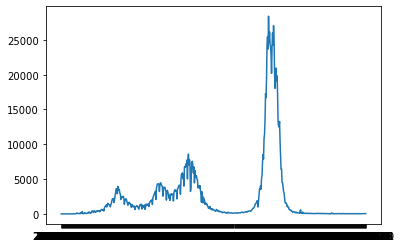

In [409]:
plt.plot(df['date'], df['diff'])
plt.show()

In [420]:
bha = bha[['date', 'state', 'diff']]
bha = bha.rename(columns = {'diff' : 'count'})
bha

,date,state,count
0,2020-03-26,Andaman and Nicobar Islands,1.0
1,2020-03-27,Andaman and Nicobar Islands,5.0
2,2020-03-28,Andaman and Nicobar Islands,3.0
3,2020-03-29,Andaman and Nicobar Islands,0.0
4,2020-03-30,Andaman and Nicobar Islands,1.0
...,...,...,...
21670,2021-10-27,West Bengal,976.0
21671,2021-10-28,West Bengal,990.0
21672,2021-10-29,West Bengal,982.0
21673,2021-10-30,West Bengal,980.0


,date,state,count
0,2020-03-26,Andaman and Nicobar Islands,1.0
1,2020-03-27,Andaman and Nicobar Islands,5.0
2,2020-03-28,Andaman and Nicobar Islands,3.0
3,2020-03-29,Andaman and Nicobar Islands,0.0
4,2020-03-30,Andaman and Nicobar Islands,1.0
...,...,...,...
21670,2021-10-27,West Bengal,976.0
21671,2021-10-28,West Bengal,990.0
21672,2021-10-29,West Bengal,982.0
21673,2021-10-30,West Bengal,980.0
